# Task 3 Credit Card Detection (CodSoft)

Domain :- Data Science 

- The dataset contains transactions made by credit cards in September 2013 by European cardholders.
- This dataset presents transactions that occurred in two days, 
    
    where we have 492 frauds out of 284,807 transactions. 
- The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

In [1]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14,8
RANDOM_SEED =42
LABELS =["Normal","Fraud"]



In [2]:
data =pd.read_csv("creditcard.csv",sep=",")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Exploratory Data Analysis

In [4]:
data.isnull().values.any()

False

C:\Users\91789\AppData\Local\Temp\ipykernel_13576\3631466999.py:4: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(data['Class'], sort=True)


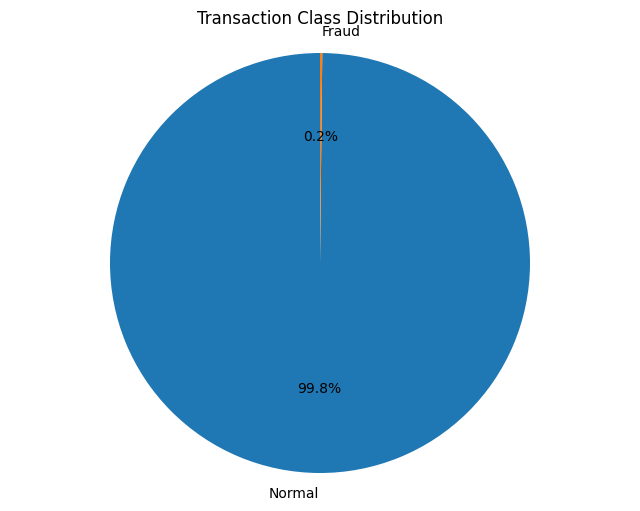

In [5]:
import matplotlib.pyplot as plt  

# Count the classes  
count_classes = pd.value_counts(data['Class'], sort=True)  

# Create pie chart  
plt.figure(figsize=(8, 6))  
plt.pie(count_classes, labels=LABELS, autopct='%1.1f%%', startangle=90)  
plt.title('Transaction Class Distribution') 
print(" ")
plt.axis('equal')
print("\n")
# Equal aspect ratio ensures that pie is drawn as a circle.  
plt.show()


In [6]:
  # Get the fraud and the normal dataset
fraud = data[data['Class']==1]
normal =data[data['Class']==0]

In [7]:
print(fraud.shape,normal.shape)


(492, 31) (284315, 31)


In [8]:
# We need to analyze more amount of information from the transaction data
# How different are the amount of money useed in different transaction classes/
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [9]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

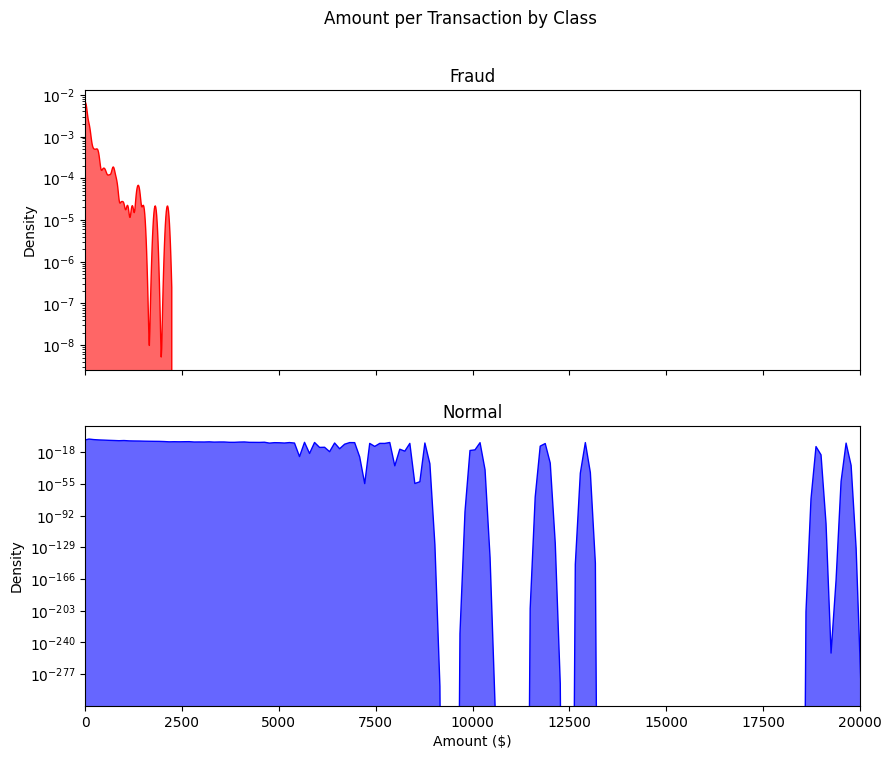

In [10]:
import seaborn as sns  
import matplotlib.pyplot as plt  

# Prepare the data  
fraud = data[data['Class'] == 1]  # Replace with your condition for fraud  
normal = data[data['Class'] == 0]  # Replace with your condition for normal  

# Create the subplots  
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 8))  
f.suptitle('Amount per Transaction by Class')  

# KDE plot for Fraud  
sns.kdeplot(fraud['Amount'], ax=ax1, fill=True, color='red', alpha=0.6, bw_adjust=0.5)  
ax1.set_title('Fraud')  
ax1.set_ylabel('Density')  

# KDE plot for Normal  
sns.kdeplot(normal['Amount'], ax=ax2, fill=True, color='blue', alpha=0.6, bw_adjust=0.5)  
ax2.set_title('Normal')  
ax2.set_xlabel('Amount ($)')  
ax2.set_ylabel('Density')  

# Set x limit and y scale for both plots  
ax1.set_xlim((0, 20000))  
ax2.set_xlim((0, 20000))  
ax1.set_yscale('log')  
ax2.set_yscale('log')  

plt.show()

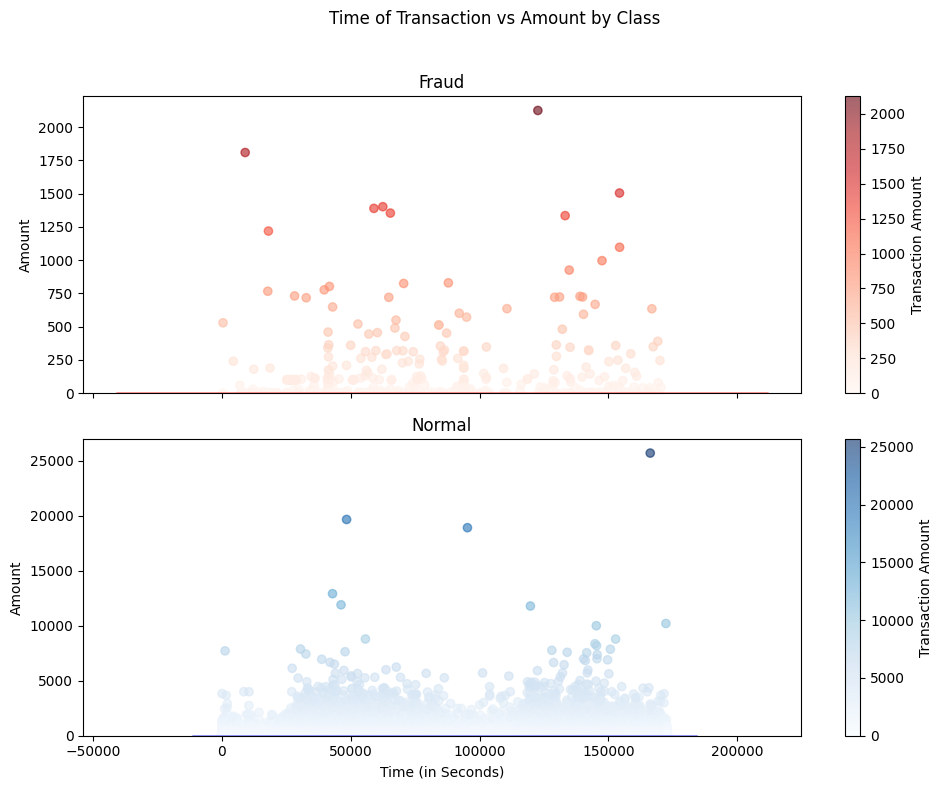

In [11]:
import matplotlib.pyplot as plt  
import seaborn as sns  

# Prepare the data  
fraud = data[data['Class'] == 1]  # Assuming Class 1 is fraud  
normal = data[data['Class'] == 0]  # Assuming Class 0 is normal  

# Create the subplots  
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 8))  
f.suptitle('Time of Transaction vs Amount by Class')  

# Scatter plot for Fraud with color coding based on Amount  
scatter1 = ax1.scatter(fraud['Time'], fraud['Amount'], c=fraud['Amount'], cmap='Reds', alpha=0.6)  
ax1.set_title('Fraud')  
ax1.set_ylabel('Amount')  
plt.colorbar(scatter1, ax=ax1, label='Transaction Amount')  

# Scatter plot for Normal with color coding based on Amount  
scatter2 = ax2.scatter(normal['Time'], normal['Amount'], c=normal['Amount'], cmap='Blues', alpha=0.6)  
ax2.set_title('Normal')  
ax2.set_ylabel('Amount')  
plt.colorbar(scatter2, ax=ax2, label='Transaction Amount')  

# Add KDE plots to indicate density  
sns.kdeplot(fraud['Time'], ax=ax1, color='red', fill=True, alpha=0.3)  
sns.kdeplot(normal['Time'], ax=ax2, color='blue', fill=True, alpha=0.3)  

plt.xlabel('Time (in Seconds)')  
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title  
plt.show()

In [12]:
## Take some sample of the data
data1 = data.sample(frac =0.1 ,random_state= 1)
data1.shape

(28481, 31)

In [13]:
data.shape

(284807, 31)

In [14]:
# Determine the number of fraud and valid transactions in the dataset
fraud = data1[data1['Class']==1]
Valid = data1[data1['Class']==0]
outlier_fraction = len(fraud)/float(len(Valid))

In [15]:
print(outlier_fraction)
print('fraud Cases : {}'.format(len(fraud)))
print('Valid Cases : {}'.format(len(Valid)))


0.0017234102419808666
fraud Cases : 49
Valid Cases : 28432


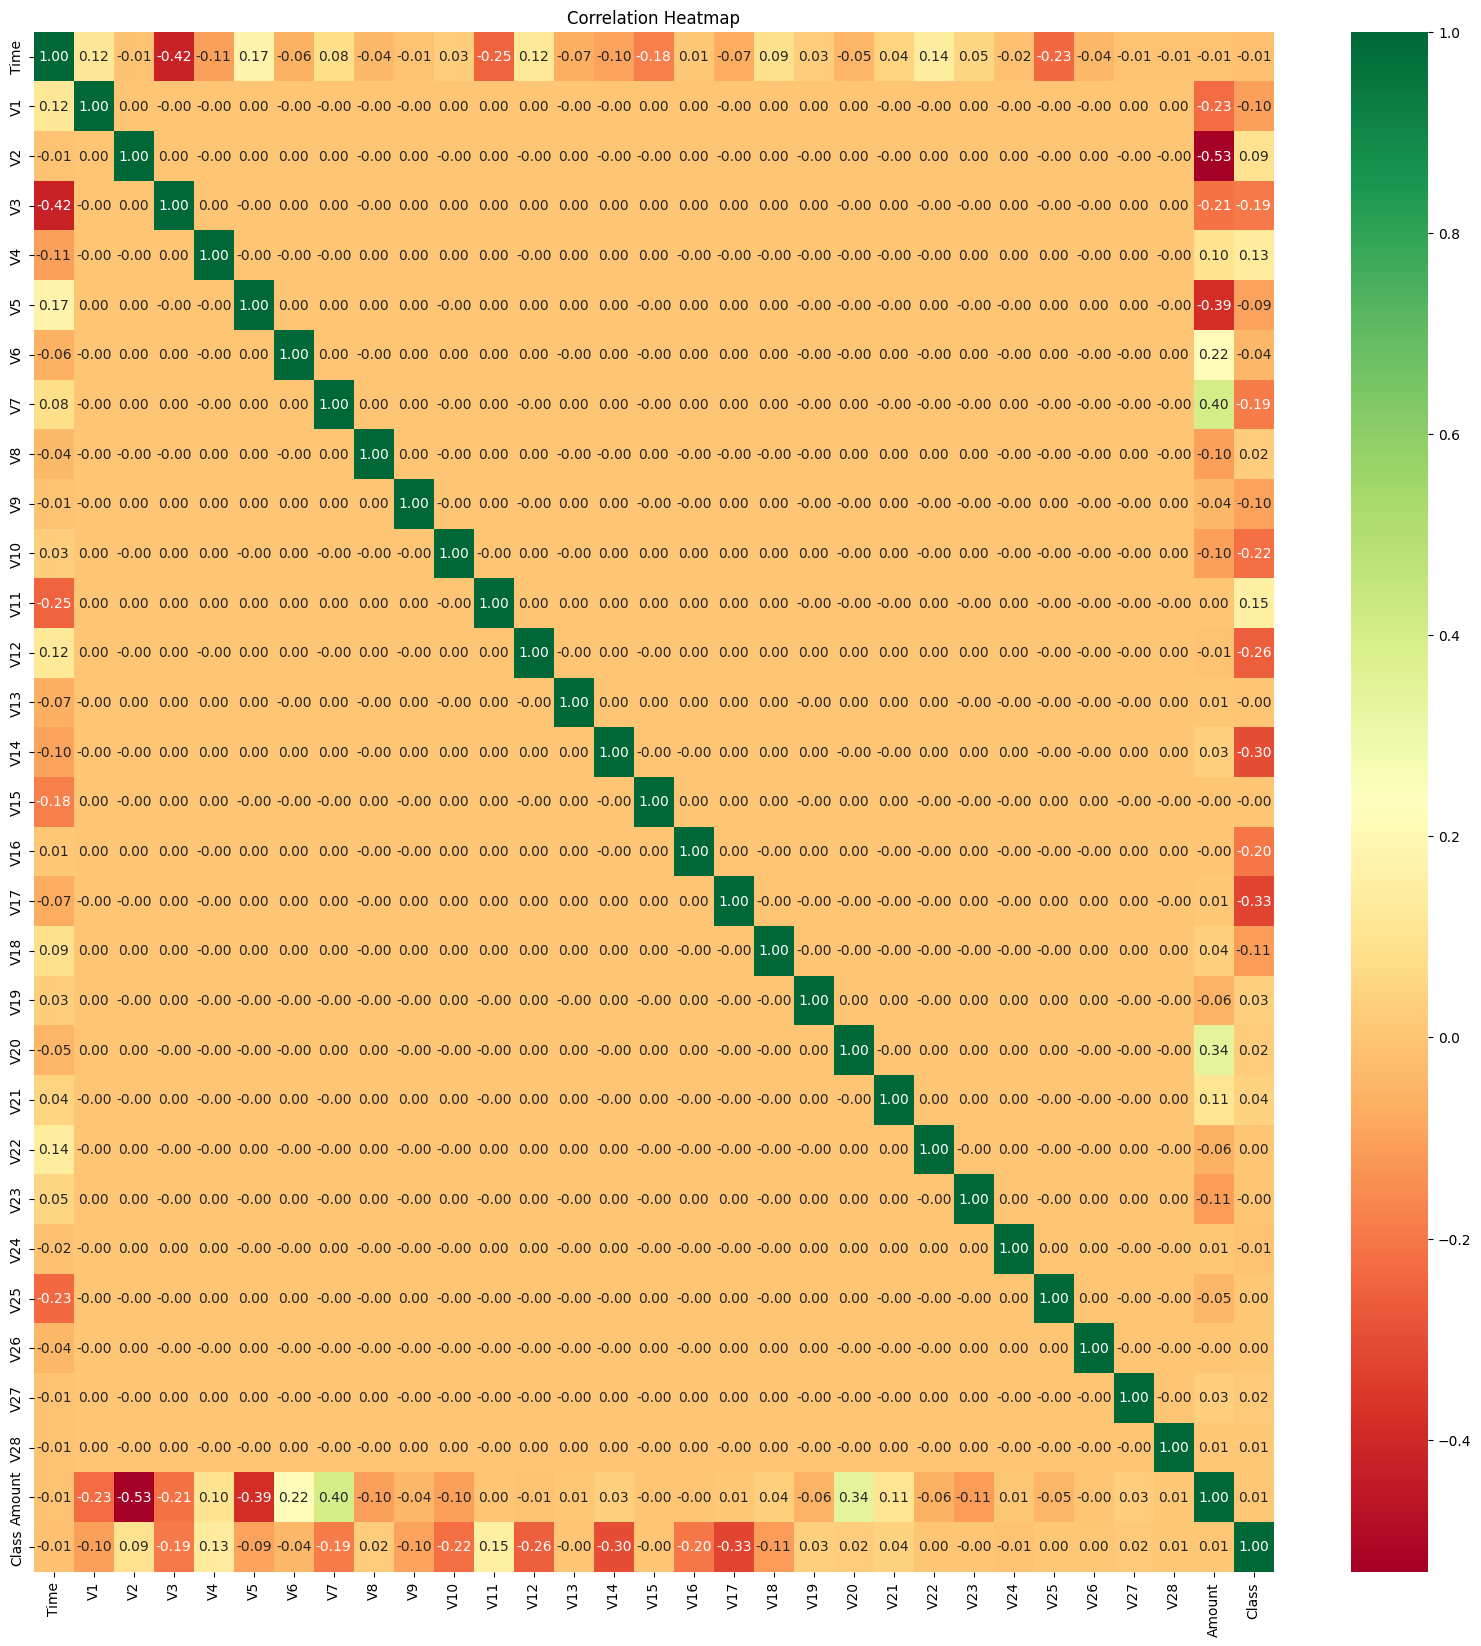

In [22]:
import seaborn as sns  
import matplotlib.pyplot as plt  

# Calculate the correlation matrix for the dataset  
correlation_matrix = data1.corr()  

# Select the top correlated features  
selected_features = correlation_matrix.index  

# Set up the figure size for the heatmap  
plt.figure(figsize=(20, 20))  

# Create a heatmap to show the correlations between the selected features  
sns.heatmap(data[selected_features].corr(), annot=True, cmap='RdYlGn', fmt=".2f")  

# Show the plot  
plt.title("Correlation Heatmap")  
plt.show()

In [17]:
# Create independent and Dependent Features 
columns =data1.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ['Class']]
#Store the variable we are predicting
target = 'Class'
# Define a random state
state = np.random.RandomState(42)
X = data1[columns]
Y = data1[target]
X_outliers = state.uniform(low = 0, high = 1 ,size =(X.shape[0] ,X.shape[1]))
#Print the shapes of X & Y 
print(X.shape)
print(Y.shape)

(28481, 30)
(28481,)


### Model Prediction

Now it is time to start building the model . The types of algorithms we are going to use to try to do anomaly deletion on this dataset are as follows
 
#### Using Isolation Forest Algorithm 


"The Isolation Forest algorithm is used for anomaly detection. It works by isolating observations in the data, with the assumption that anomalies are easier to isolate than normal points. It is efficient and effective for identifying outliers in large datasets.
"

#### Using Local Outlier Factor (LOF) Algorithm

  The Local Outlier Factor (LOF) algorithm is used for:

1. Anomaly Detection: Identifies outliers in data.
2. Handling Varying Densities: Works well when data points have different densities.
3. No Predefined Distribution: Does not assume a specific data distribution.
4. Local Context: Analyzes the local structure of data for accurate outlier detection.

LOF is valuable in fields like finance, security, and quality control.

In [18]:
# Define the outliers detection methods

classifiers = {
   "Isolation Forest" : IsolationForest (n_estimators =100 , max_samples =len(X),
                                         contamination = outlier_fraction , random_state =state, verbose=0),  
   "Local Outlier Factor" : LocalOutlierFactor(n_neighbors = 20, algorithm ='auto',
                                              leaf_size =30, metric='minkowski',
                                              p=2 , metric_params =None,contamination = outlier_fraction),
    "Support Vector Machine" : OneClassSVM(kernel ='rbf' , degree = 3, gamma=0.1 ,nu =0.05,
                                           max_iter = -1)
}

In [19]:
from sklearn.svm import OneClassSVM  

# Initialize the OneClassSVM without random_state  
model = OneClassSVM(kernel='rbf', nu=0.5)  # Adjust parameters as needed

In [20]:
type(classifiers)

dict

In [21]:
from sklearn.metrics import accuracy_score, classification_report  

n_outliers = len(fraud)  
for i, (clf_name, clf) in enumerate(classifiers.items()):  
    # Fit the data and tag outliers  
    if clf_name == "Local Outlier Factor":  
        y_pred = clf.fit_predict(X)  
        scores_prediction = clf.negative_outlier_factor_  
    elif clf_name == "Support Vector Machine":  
        clf.fit(X)  
        y_pred = clf.predict(X)  
    else:  
        clf.fit(X)  
        scores_prediction = clf.decision_function(X)  
        y_pred = clf.predict(X)  
        
    # Reshape the prediction values: 0 for valid transactions, 1 for fraud transactions  
    y_pred[y_pred == 1] = 0  
    y_pred[y_pred == -1] = 1  
    
    n_errors = (y_pred != Y).sum()  
    
    # Run Classification Metrics   
    print("{}: {}".format(clf_name, n_errors))  
    print("Accuracy Score: {}".format(accuracy_score(Y, y_pred)))  
    print("Classification Report:\n{}".format(classification_report(Y, y_pred)))

Isolation Forest: 73
Accuracy Score: 0.9974368877497279
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.26      0.27      0.26        49

    accuracy                           1.00     28481
   macro avg       0.63      0.63      0.63     28481
weighted avg       1.00      1.00      1.00     28481

Local Outlier Factor: 97
Accuracy Score: 0.9965942207085425
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.02      0.02      0.02        49

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481

Support Vector Machine: 8516
Accuracy Score: 0.7009936448860644
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.70      0.8